Import dataset

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Import Library

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import plotly.express as px
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
stop_words = set(stopwords.words('english'))


In [3]:
df = pd.read_csv('D:/Coding/jptNB/HocMayThongKe/DoAn/archive/IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df.shape

(50000, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


Text(0.5, 1.0, 'Sentiment Distribution')

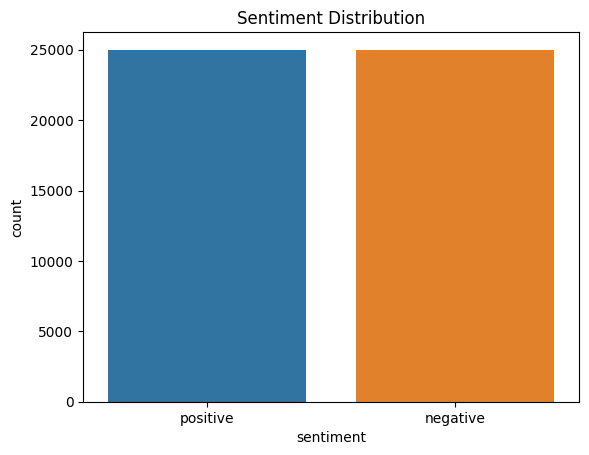

In [7]:
sns.countplot(x='sentiment', data=df)
plt.title("Sentiment Distribution")

In [8]:
for i in range(5):
    print("Review: ", [i])
    print(df['review'].iloc[i], "\n")
    print("sentiment: ", df['sentiment'].iloc[i], "\n\n")

Review:  [0]
One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is d

In [9]:
def no_of_words(text):
    words = text.split()
    word_count = len(words)
    return word_count


In [10]:
df['word_count'] = df['review'].apply(no_of_words)

In [11]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


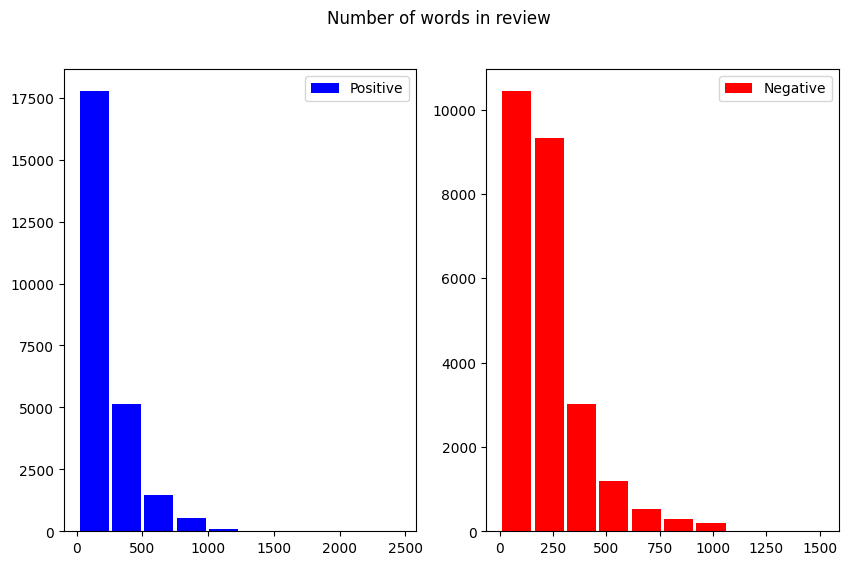

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['word_count'], label = 'Positive', color = 'blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['word_count'], label = 'Negative', color = 'red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

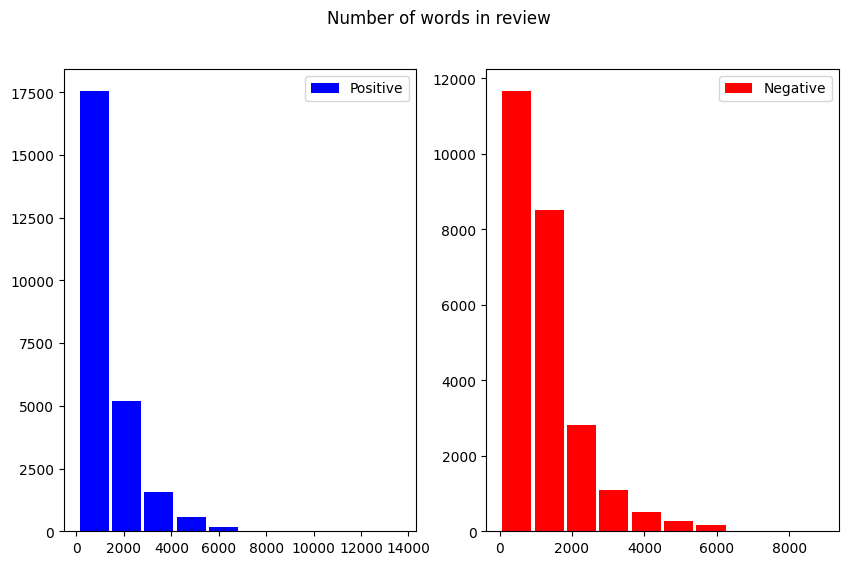

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10,6))
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.len(), label = 'Positive', color = 'blue', rwidth=0.9);
ax[0].legend(loc='upper right');
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.len(), label = 'Negative', color = 'red', rwidth=0.9);
ax[1].legend(loc='upper right');
fig.suptitle("Number of words in review")
plt.show()

In [14]:
df.sentiment.replace("positive", 1, inplace = True)
df.sentiment.replace("negative", 2, inplace = True)

In [15]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,2,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


**Prepocessing**

In [16]:
def data_preprocessing(text):
    text=text.lower()
    text=re.sub('<br />', '', text)
    text=re.sub(r"https\S+|www\S+|https\S+", '',text, flags=re.MULTILINE)
    text=re.sub(r'\@w+|\#', '', text)
    text=re.sub(r'[^\w\s]', '', text)
    text_tokens=word_tokenize(text)
    filtered_text=[w for w in text_tokens if not w in stop_words]
    return " ".join(filtered_text)

In [17]:
df.review = df['review'].apply(data_preprocessing)

In [18]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production filming technique ...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically theres family little boy jake thinks...,2,138
4,petter matteis love time money visually stunni...,1,230


In [19]:
duplicated_count = df.duplicated().sum()
print("Number of duplicated entries: ", duplicated_count)

Number of duplicated entries:  421


In [20]:
df = df.drop_duplicates("review")

In [21]:
duplicated_count = df.duplicated().sum()
print("Number of duplicated entries: ", duplicated_count)

Number of duplicated entries:  0


In [22]:
stemmer = PorterStemmer()
def stemming(data):
    text = [stemmer.stem(word) for word in data]
    return data

In [23]:
df.review = df['review'].apply(lambda x: stemming(x))

In [24]:
df['word_count'] = df['review'].apply(no_of_words)
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
3,basically theres family little boy jake thinks...,2,67
4,petter matteis love time money visually stunni...,1,125


In [25]:
pos_reviews = df[df.sentiment == 1]
pos_reviews.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,168
1,wonderful little production filming technique ...,1,84
2,thought wonderful way spend time hot summer we...,1,86
4,petter matteis love time money visually stunni...,1,125
5,probably alltime favorite movie story selfless...,1,58


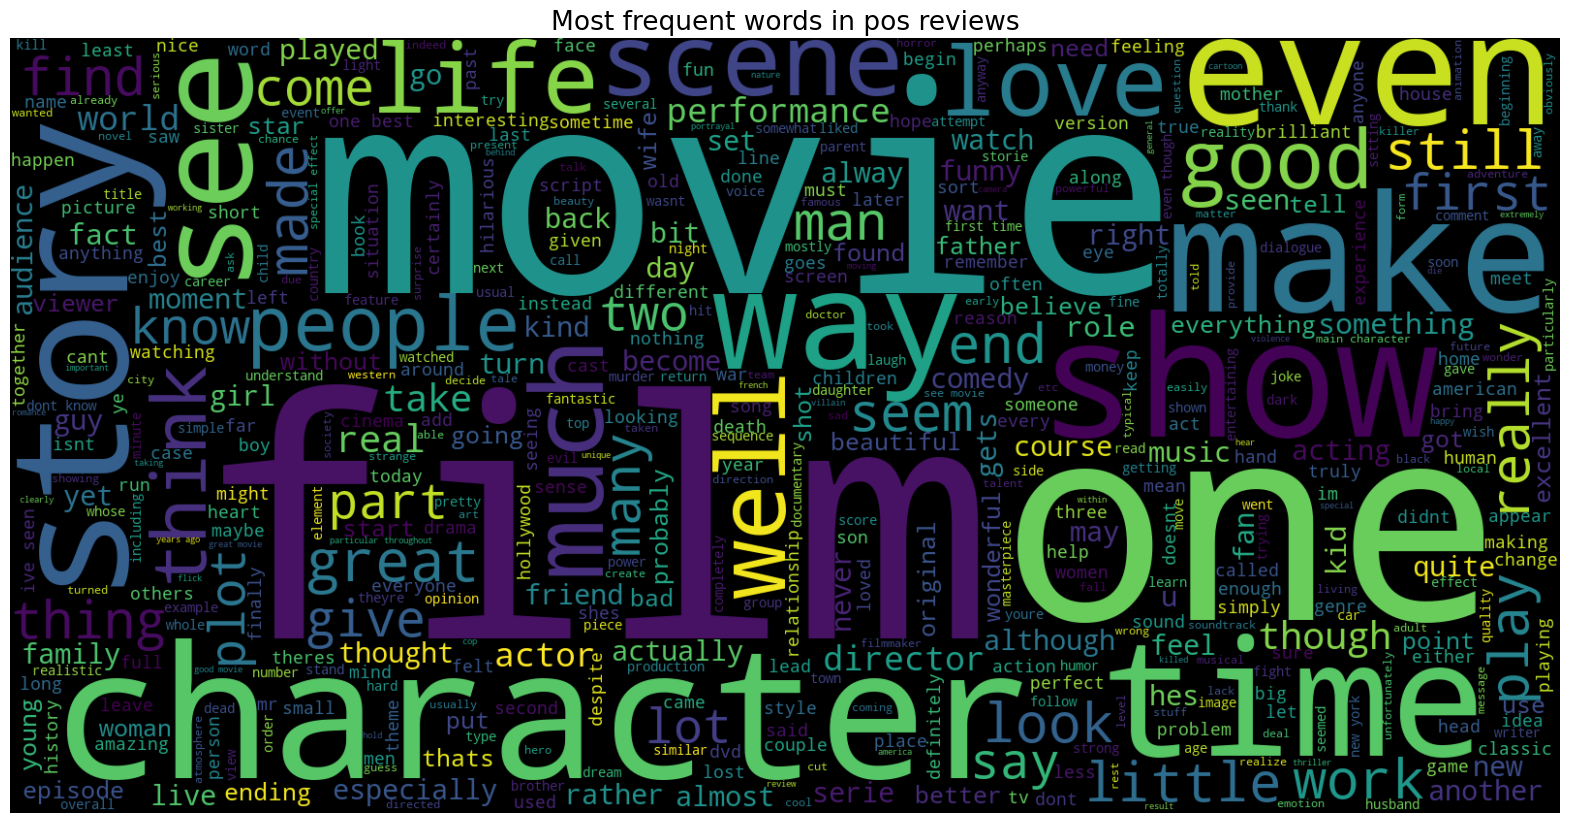

In [26]:
text = ' '.join([word for word in pos_reviews['review']])
plt.figure(figsize=(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in pos reviews', fontsize = 19)
plt.show()

In [27]:
from collections import Counter
count = Counter()
for text in pos_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('film', 39285),
 ('movie', 35830),
 ('one', 25621),
 ('like', 16998),
 ('good', 14281),
 ('great', 12568),
 ('story', 12338),
 ('see', 11814),
 ('time', 11724),
 ('well', 10930),
 ('really', 10638),
 ('also', 10516),
 ('would', 10320),
 ('even', 9318),
 ('much', 8971)]

In [28]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['word', 'count']
pos_words.head()

,word,count
0,film,39285
1,movie,35830
2,one,25621
3,like,16998
4,good,14281


In [29]:
px.bar(pos_words, x='count', y='word', title ='Common words in positive reviews', color = 'word')

In [30]:
neg_reviews = df[df.sentiment == 2]
neg_reviews.head()

,review,sentiment,word_count
3,basically theres family little boy jake thinks...,2,67
7,show amazing fresh innovative idea 70s first a...,2,83
8,encouraged positive comments film looking forw...,2,64
10,phil alien one quirky films humour based aroun...,2,51
11,saw movie 12 came recall scariest scene big bi...,2,84


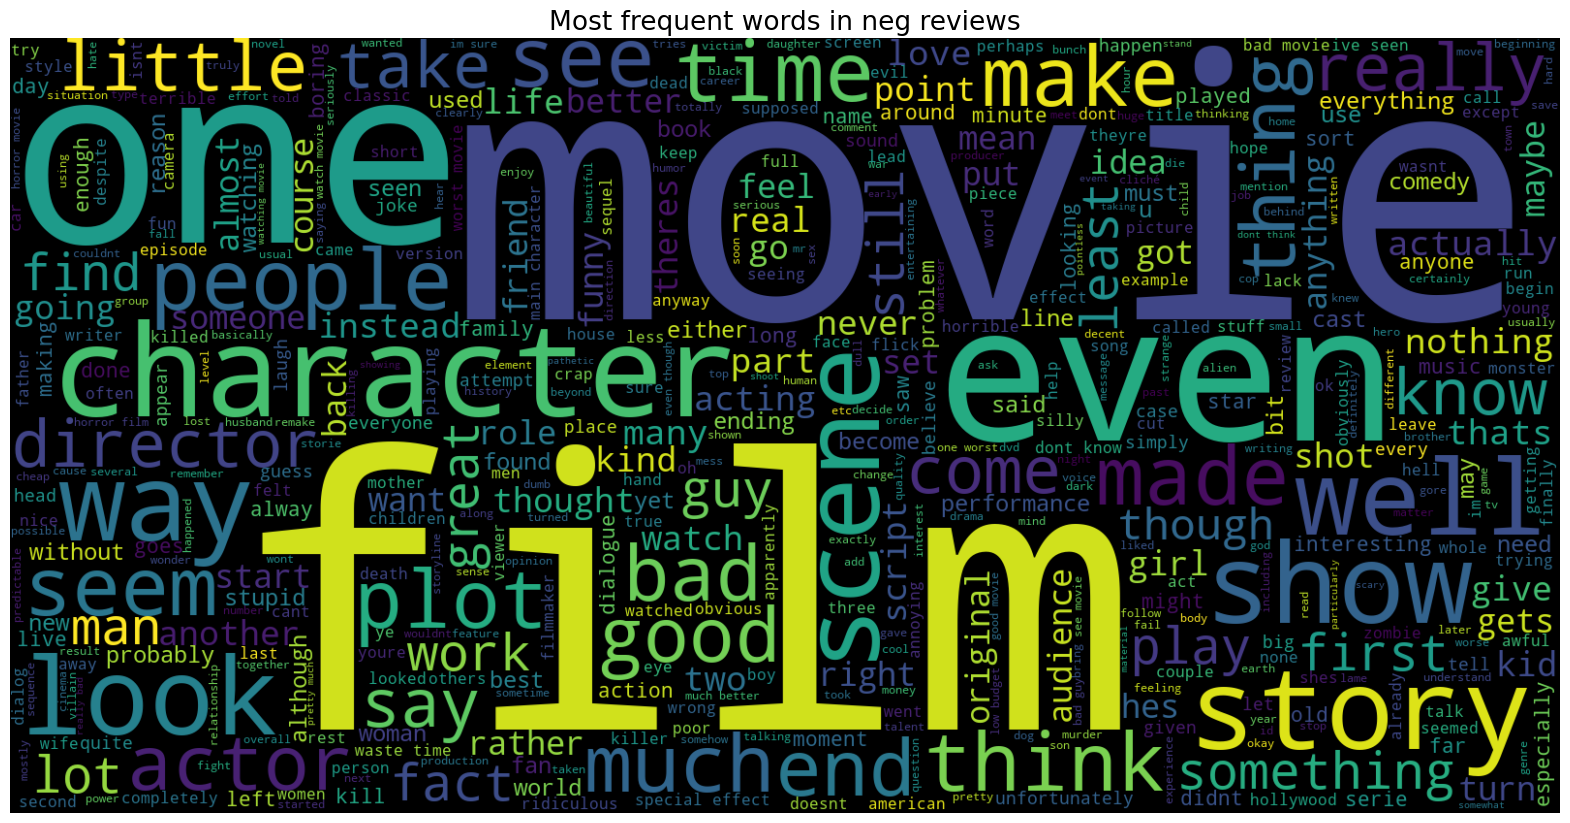

In [31]:
text = ' '.join([word for word in neg_reviews['review']])
plt.figure(figsize=(20,15), facecolor = 'None')
wordcloud = WordCloud(max_words=500,width=1600,height=800).generate(text)
plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.title('Most frequent words in neg reviews', fontsize = 19)
plt.show()

In [32]:
from collections import Counter
count = Counter()
for text in neg_reviews['review'].values:
    for word in text.split():
        count[word] +=1
count.most_common(15)

[('movie', 47001),
 ('film', 34651),
 ('one', 24361),
 ('like', 21508),
 ('even', 14759),
 ('good', 13995),
 ('bad', 13903),
 ('would', 13482),
 ('really', 12084),
 ('time', 11349),
 ('see', 10412),
 ('dont', 9912),
 ('get', 9884),
 ('much', 9758),
 ('story', 9563)]

In [33]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['word', 'count']
neg_words.head()

,word,count
0,movie,47001
1,film,34651
2,one,24361
3,like,21508
4,even,14759


In [34]:
px.bar(neg_words, x='count', y='word', title ='Common words in negative reviews', color = 'word')

**Factorize**

In [37]:
#read csv file
df = pd.read_csv('D:/Coding/jptNB/HocMayThongKe/DoAn/archive/IMDB_preprocessing.csv')

In [38]:
X = df['review']
Y = df['sentiment']

In [39]:
vect = TfidfVectorizer()
X = vect.fit_transform(df['review'])

In [40]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [41]:
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (34704, 221768)
Size of y_train:  (34704,)
Size of x_test:  (14874, 221768)
Size of y_test:  (14874,)


**IMPORTING MODELS**

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings 
warnings.filterwarnings('ignore')

*Logistic Regression*

In [43]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))

Test accuracy: 89.01%


In [44]:
print(confusion_matrix(y_test, logreg_pred))
print("\n")
print(classification_report(y_test, logreg_pred))

[[6786  727]
 [ 907 6454]]


              precision    recall  f1-score   support

           1       0.88      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [45]:
#grid search for logistic regression 
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(logreg, param_grid, cv=5)
grid.fit(x_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Test accuracy: {:.2f}%".format(grid.score(x_test, y_test)*100))


Best cross-validation score: 0.89
Best parameters:  {'C': 10}
Best estimator:  LogisticRegression(C=10)
Test accuracy: 89.42%


In [46]:
#train model with best parameters
logreg = LogisticRegression(C=10)
logreg.fit(x_train, y_train)
logreg_pred = logreg.predict(x_test)
logreg_acc = accuracy_score(logreg_pred, y_test)
print("Test accuracy: {:.2f}%".format(logreg_acc*100))


Test accuracy: 89.42%


*Naive Bayes*

In [47]:
mnb = MultinomialNB()
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))

Test accuracy: 86.44%


In [48]:
print(confusion_matrix(y_test, mnb_pred))
print("\n")
print(classification_report(y_test, mnb_pred))

[[6439 1074]
 [ 943 6418]]


              precision    recall  f1-score   support

           1       0.87      0.86      0.86      7513
           2       0.86      0.87      0.86      7361

    accuracy                           0.86     14874
   macro avg       0.86      0.86      0.86     14874
weighted avg       0.86      0.86      0.86     14874



In [49]:
#grid search for multinomial naive bayes
from sklearn.model_selection import GridSearchCV
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(mnb, param_grid, cv=5)
grid.fit(x_train, y_train)

print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)
print("Best estimator: ", grid.best_estimator_)
print("Test accuracy: {:.2f}%".format(grid.score(x_test, y_test)*100))

Best cross-validation score: 0.86
Best parameters:  {'alpha': 1}
Best estimator:  MultinomialNB(alpha=1)
Test accuracy: 86.44%


In [50]:
mnb = MultinomialNB(alpha=1)
mnb.fit(x_train, y_train)
mnb_pred = mnb.predict(x_test)
mnb_acc = accuracy_score(mnb_pred, y_test)
print("Test accuracy: {:.2f}%".format(mnb_acc*100))


Test accuracy: 86.44%


*SVC*

In [51]:
svc = LinearSVC()
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.24%


In [52]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6767  746]
 [ 855 6506]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.89      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



In [53]:
from sklearn.model_selection import GridSearchCV
param_grid = {'C' :[0.1, 1, 10, 100], 'loss':['hinge', 'squared_hinge']}
grid = GridSearchCV(svc, param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .................C=0.1, loss=hinge;, score=0.872 total time=   0.0s
[CV 2/5] END .................C=0.1, loss=hinge;, score=0.875 total time=   0.1s
[CV 3/5] END .................C=0.1, loss=hinge;, score=0.871 total time=   0.0s
[CV 4/5] END .................C=0.1, loss=hinge;, score=0.878 total time=   0.0s
[CV 5/5] END .................C=0.1, loss=hinge;, score=0.874 total time=   0.1s
[CV 1/5] END .........C=0.1, loss=squared_hinge;, score=0.892 total time=   0.1s
[CV 2/5] END .........C=0.1, loss=squared_hinge;, score=0.895 total time=   0.1s
[CV 3/5] END .........C=0.1, loss=squared_hinge;, score=0.888 total time=   0.1s
[CV 4/5] END .........C=0.1, loss=squared_hinge;, score=0.894 total time=   0.1s
[CV 5/5] END .........C=0.1, loss=squared_hinge;, score=0.890 total time=   0.1s
[CV 1/5] END ...................C=1, loss=hinge;, score=0.895 total time=   0.3s
[CV 2/5] END ...................C=1, loss=hinge;,

GridSearchCV(estimator=LinearSVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'loss': ['hinge', 'squared_hinge']},
             verbose=3)

In [54]:
print("Best cross validation score : {:.2f}".format(grid.best_score_))
print("best parameters: ", grid.best_params_)

Best cross validation score : 0.89
best parameters:  {'C': 1, 'loss': 'hinge'}


In [55]:
svc = LinearSVC(C = 1, loss ='hinge' )
svc.fit(x_train, y_train)
svc_pred = svc.predict(x_test)
svc_acc = accuracy_score(svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(svc_acc*100))

Test accuracy: 89.41%


In [56]:
print(confusion_matrix(y_test, svc_pred))
print("\n")
print(classification_report(y_test, svc_pred))

[[6789  724]
 [ 851 6510]]


              precision    recall  f1-score   support

           1       0.89      0.90      0.90      7513
           2       0.90      0.88      0.89      7361

    accuracy                           0.89     14874
   macro avg       0.89      0.89      0.89     14874
weighted avg       0.89      0.89      0.89     14874



Ensemble Models 

In [57]:
#combine all models with voting classifier
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(estimators = [('Logistic Regression', logreg), ('Multinomial Naive Bayes', mnb), ('Linear SVC', svc)], voting = 'hard')
voting_clf.fit(x_train, y_train)
voting_pred = voting_clf.predict(x_test)
voting_acc = accuracy_score(voting_pred, y_test)

In [58]:
#print out the accuracy score for each model
print("Test accuracy of logisitic regression: {:.2f}%".format(logreg_acc*100))
print("Test accuracy of multinomial Naive Bayes:  {:.2f}%".format(mnb_acc*100))
print("Test accuracy SVC: {:.2f}%".format(svc_acc*100))
print("Test accuracy Voting Classifier from the above models: {:.2f}%".format(voting_acc*100))
#print out 
print(confusion_matrix(y_test, voting_pred))
print("\n")
print(classification_report(y_test, voting_pred))

Test accuracy of logisitic regression: 89.42%
Test accuracy of multinomial Naive Bayes:  86.44%
Test accuracy SVC: 89.41%
Test accuracy Voting Classifier from the above models: 89.68%
[[6800  713]
 [ 822 6539]]


              precision    recall  f1-score   support

           1       0.89      0.91      0.90      7513
           2       0.90      0.89      0.89      7361

    accuracy                           0.90     14874
   macro avg       0.90      0.90      0.90     14874
weighted avg       0.90      0.90      0.90     14874



In [59]:
# #xgboost classifier
# from xgboost import XGBClassifier
# xgb = XGBClassifier()
# #convert y from 1 to 1 and 2 to 0
# y_train = y_train.replace(2, 0)
# y_test = y_test.replace(2, 0)

# xgb.fit(x_train, y_train)
# xgb_pred = xgb.predict(x_test)
# xgb_acc = accuracy_score(xgb_pred, y_test)
# print("Test accuracy xgboost: {:.2f}%".format(xgb_acc*100))


In [60]:
#saving each model as a pickle file
#path to save the model: D:/coding/jptnb/hocmaythongke/doan/models

import pickle
pickle.dump(logreg, open('D:/coding/jptnb/hocmaythongke/doan/models/logreg.pkl', 'wb')) #where the model is saved
pickle.dump(mnb, open('D:/coding/jptnb/hocmaythongke/doan/models/mnb.pkl', 'wb')) #where the model is saved
pickle.dump(svc, open('D:/coding/jptnb/hocmaythongke/doan/models/svc.pkl', 'wb')) #where the model is saved
pickle.dump(voting_clf, open('D:/coding/jptnb/hocmaythongke/doan/models/voting_clf.pkl', 'wb')) #where the model is saved
# pickle.dump(xgb, open('D:/coding/jptnb/hocmaythongke/doan/models/xgb.pkl', 'wb'))

#where the model is saved


In [61]:
from sklearn.calibration import CalibratedClassifierCV
calibrated_svc = CalibratedClassifierCV(svc)
calibrated_svc.fit(x_train, y_train)
calibrated_svc_pred = calibrated_svc.predict(x_test)
calibrated_svc_acc = accuracy_score(calibrated_svc_pred, y_test)
print("Test accuracy: {:.2f}%".format(calibrated_svc_acc*100))


Test accuracy: 89.49%


In [62]:
pickle.dump(calibrated_svc, open('D:/coding/jptnb/hocmaythongke/doan/models/svc_prob.pkl', 'wb')) #where the model is saved

In [63]:
#soft voting classifier
voting_clf_soft = VotingClassifier(estimators = [('Logistic Regression', logreg), ('Multinomial Naive Bayes', mnb), ('Linear SVC', calibrated_svc)], voting = 'soft')
voting_clf_soft.fit(x_train, y_train)
voting_soft_pred = voting_clf_soft.predict(x_test)
voting_soft_acc = accuracy_score(voting_soft_pred, y_test)
#accuracy score
print("Test accuracy of soft voting classifier: {:.2f}%".format(voting_soft_acc*100))



Test accuracy of soft voting classifier: 89.78%


In [64]:
pickle.dump(voting_clf_soft, open('D:/coding/jptnb/hocmaythongke/doan/models/voting_clf_soft.pkl', 'wb')) #where the model is saved